In [1]:
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from divtel.telescope import Telescope, Array

In [2]:
file = open("/Users/alicedonini/Lavoro/Divergent/Divergent-Pointing/layout-3AL4M15-5.txt", "r")
#array = Array()
tels = []
for line in file:  
    #split the string on whitespace, return a list of numbers as strings
    coord_str = line.split()
    coord_str[0], coord_str[1], coord_str[2] = float(coord_str[0]), float(coord_str[1]), float(coord_str[2]) 
    coord = [x*u.m for x in coord_str]
    #print(coord_float)
    tel = Telescope(coord[0],coord[1],coord[2],coord[3],coord[4])
    tels.append(tel)
    
array = Array(tels)

for tel in array.telescopes:
    #print(tel.fov)
    print(tel.id)
    #print(tel.position)
    #print(tel.camera_radius)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [43]:
#Define where you want to point (ex. source in the simulation)
az = 180 * u.deg
alt = 70 * u.deg
#Define divergence
div=0.01

#Divergent part
np.array(array.divergent_pointing(div, alt, az))
tels_alt = np.array([tel.alt.value for tel in array.telescopes])
tels_az = np.array([tel.az.value for tel in array.telescopes])
print("Az: ", np.degrees(tels_az))
print("Alt: ", np.degrees(tels_alt))
print("barycenter: ", array.barycenter)

#telescopes_distances = np.sqrt(np.sum((array.positions_array - array.barycenter)**2, axis=1))
#p = np.average(array.pointing_vectors, weights=telescopes_distances, axis=0)
#print(np.degrees(p))

Az:  [-179.43271355  178.56899442  178.79465233 -179.19961391  179.61427404
  176.80883417  176.25659289  178.16815012 -177.13527288 -177.14120842
 -177.60119723  174.19665891 -174.25762736 -174.88691509  179.68685922
  174.39355836  177.69621147 -179.0762965  -174.64350362]
Alt:  [70.03920723 70.20534436 70.80028562 70.56760052 69.30096957 69.4021928
 70.47193888 71.30419905 71.04391652 69.99036459 69.28849379 69.72788694
 70.47852498 69.35578001 70.39574466 68.59882909 68.58904641 68.49318128
 71.45341834]
barycenter:  [-75.7         26.57684211  49.07894737]


(-403.96335663082436,
 233.25335663082436,
 -342.23567660044154,
 419.2256766004415)

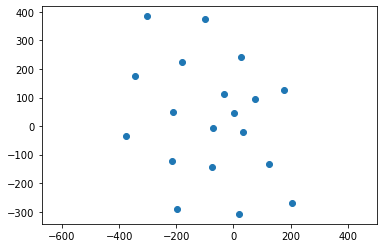

In [44]:
#array layout plot
plt.scatter(array.positions_array[:,0], array.positions_array[:,1])
plt.axis('equal')

(-342.2303566308244, 419.22035663082437, -403.9686766004415, 233.2586766004415)

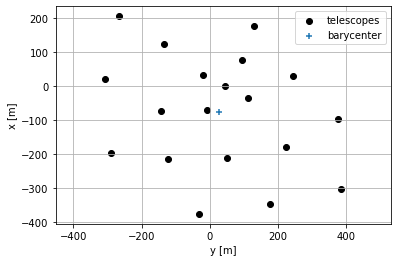

In [45]:
#2D display
ax = array.display_2d(projection='xy')
ax.legend()
plt.axis('equal')

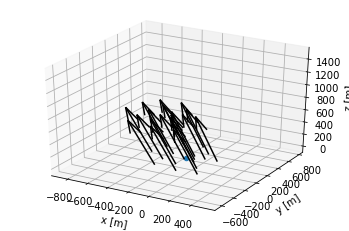

In [46]:
#3D display
ax = array.display_3d()
fig = ax.scatter(array.barycenter[0], array.barycenter[1], array.barycenter[2])
#plt.savefig("3d.png")

In [47]:
#tel dictionary with div pointing
tels_dict = {}
point_az_dict = {}
point_alt_dict = {}

for tel_id, tel in enumerate(array.telescopes, 1):
    #tels_dict[ii] = {'THETA': 90-np.rad2deg(tel.alt.value),
    #                 'PHI': np.rad2deg(np.mod(tel.az.value, 2*np.pi))}
    tels_dict[tel_id] = {'az': tel.az,
                     'alt': tel.alt}
    point_az_dict[tel_id] = tel.az.value * u.rad
    point_alt_dict[tel_id] = tel.alt.value * u.rad

In [48]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.time import Time

#print(tels_az)

location = EarthLocation.of_site('Roque de los Muchachos')
obstime = Time('2013-11-01T03:00')
altaz = AltAz(location=location, obstime=obstime)

#Define pointing as a SkyCoord object
#tels_pointing = {}
#for tel_id, tel in enumerate(array.telescopes, 1):
#    tels_pointing[tel_id] = SkyCoord(alt=tel.alt,az=tel.az, frame=AltAz())
#print(tels_pointing)

tels_pointing = SkyCoord(alt=tels_alt,az=tels_az, frame=altaz, unit='rad')
#print(tels_pointing)

array_pointing = SkyCoord(alt=70, az=180, frame=altaz, unit='deg')
#print(array_pointing)

icrs_point = tels_pointing.transform_to(ICRS())
print(tels_pointing.transform_to(ICRS()))

gal_point = tels_pointing.galactic
#print(fk5_point)



<SkyCoord (ICRS): (ra, dec) in deg
    [(67.29753087,  8.76890512), (67.98380841,  8.94045252),
     (67.89441478,  9.53364244), (67.22295525,  9.29802894),
     (67.63214831,  8.03061876), (68.62797766,  8.16040683),
     (68.75987495,  9.238987  ), (68.0880653 , 10.04248002),
     (66.54809481,  9.79254454), (66.50413104,  8.73983811),
     (66.63785858,  8.03218584), (69.52414649,  8.54979176),
     (65.55120946,  9.29051263), (65.67521869,  8.1537189 ),
     (67.59943378,  9.1252511 ), (69.55553523,  7.41893795),
     (68.34315081,  7.33411497), (67.1541537 ,  7.2241872 ),
     (65.76229182, 10.25127056)]>


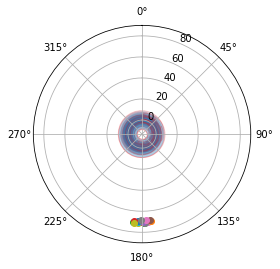

In [49]:
#NOT WORKING
from astropy.visualization.wcsaxes import SphericalCircle
ax = plt.gca(projection='polar')

for tel in tels_pointing:
    az_rad = tel.az.radian
    az_deg = tel.az.degree
    alt_deg = tel.alt.degree
    #r = plt.Circle((az_rad,alt_deg), 2, facecolor="red")
    r = SphericalCircle((alt_deg * u.deg, az_deg * u.deg), 7/2 * u.degree, edgecolor='red', alpha=0.2)
    ax.add_patch(r)
    ax.scatter(az_rad, alt_deg)
ax.set_theta_zero_location('N') # Position of azimuth = 0
ax.set_theta_direction(-1) #Direction of azimuth increase. Clockwise is -1
ax.grid(True)
ax.set_aspect(1.)
ax.set_rmax(90)
#ax.set_xlim(0, 180)
#ax.set_ylim(0, -90)
plt.savefig("polar1.png")
plt.show()

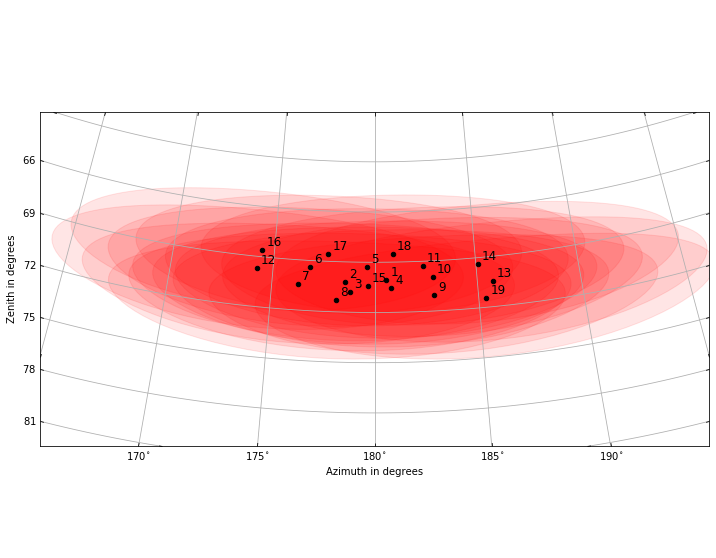

In [69]:
#SEEMS WORKING
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

# PolarAxes.PolarTransform takes radian. However, we want our coordinate
# system in degree
tr = Affine2D().scale(np.pi/180., 1.).translate(+np.pi/2.,0) + PolarAxes.PolarTransform()

# polar projection, which involves cycle, and also has limits in
# its coordinates, needs a special method to find the extremes
# (min, max of the coordinate within the view).

# 20, 20 : number of sampling points along x, y direction
n = 20
extreme_finder = angle_helper.ExtremeFinderCycle(10, 10,
                                                 lon_cycle=360,
                                                 lat_cycle=None,
                                                 lon_minmax=None,
                                                 lat_minmax=(-90, 90),
                                                 )

grid_locator1 = angle_helper.LocatorDMS(12)
# Find a grid values appropriate for the coordinate (degree,
# minute, second).

tick_formatter1 = angle_helper.FormatterDMS()
# And also uses an appropriate formatter.  Note that,the
# acceptable Locator and Formatter class is a bit different than
# that of mpl's, and you cannot directly use mpl's Locator and
# Formatter here (but may be possible in the future).

grid_helper = GridHelperCurveLinear(tr,
                                    extreme_finder=extreme_finder,
                                    grid_locator1=grid_locator1,
                                    tick_formatter1=tick_formatter1
                                    )

fig = plt.figure(figsize=(12,10))
fig.clf()
ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

# make ticklabels of right and top axis visible.
ax1.axis["right"].major_ticklabels.set_visible(False)
ax1.axis["top"].major_ticklabels.set_visible(False)
ax1.axis["bottom"].major_ticklabels.set_visible(True)

# let right axis shows ticklabels for 1st coordinate (angle)
#ax1.axis["right"].get_helper().nth_coord_ticks = 0
# let bottom axis shows ticklabels for 2nd coordinate (radius)
#ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

fig.add_subplot(ax1)
# A parasite axes with given transform
ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
# note that ax2.transData == tr + ax1.transData
# Anything you draw in ax2 will match the ticks and grids of ax1.
ax1.parasites.append(ax2)

for i, tel in enumerate(tels_pointing, 1):
    x = tel.az.degree
    y = tel.alt.degree
    #r = plt.Circle((x,y), 2, facecolor="red")
    r = SphericalCircle((x * u.deg, y * u.deg), 7/2 * u.degree, color='r', alpha=0.1, transform=ax2.transData)
    #TODO!!!!! insert right value of radius of the field of view
    ax1.add_patch(r)
    ax2.annotate(i, (x, y), fontsize=12, xytext=(4, 4), textcoords='offset pixels', zorder=10)
    ax1.scatter(x, y, c = "black", s=20, transform=ax2.transData, zorder=10)

ax1.set_xlim(-20,20)
ax1.set_ylim(-80, -60)
#ax1.set_xlim(-181, 181)
#ax1.set_ylim(-91, 91)
ax1.set_aspect(1.)

ax1.grid(True)
ax1.set_xlabel("Azimuth in degrees", fontsize=20)
ax1.set_ylabel("Zenith in degrees", fontsize=20)


#plt.savefig("test.png")
plt.show()


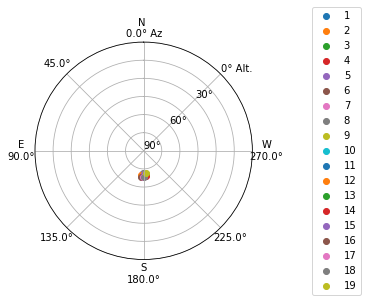

In [70]:
#SKYMAP
from astroplan.plots import plot_sky
from astroplan import FixedTarget
from astroplan import Observer

for ii, tel in enumerate(icrs_point, 1):
    #print(tel.ra)
    point = SkyCoord(ra=tel.ra, dec=tel.dec)
    target = FixedTarget(coord=point, name=ii)
    #print(target.coord)
    location = EarthLocation.of_site('Roque de los Muchachos')
    observer = Observer(location=location, name="Roque")
    observe_time = Time('2013-11-01T03:00')
    plot_sky(target, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.savefig("astroplan.png")

plt.show()